### Problem Statement 
<b>Market Trends and App Performance</b>: What are the top categories on the Play Store, and how do app installations vary across these categories? Are most apps in these categories paid or free, and how does this influence their overall popularity and user engagement?

<b>Impact of Ratings and Reviews</b>: How do ratings and reviews influence an app's success? Specifically, how do factors such as the app being paid or free, its last update date, and content rating affect its overall rating, review sentiment, and user perception?

<b>Consumer Behavior and Sentiment Analysis</b>: How do user sentiment, subjectivity, and polarity differ between paid and free apps? What percentage of review sentiments are positive or negative, and how does this sentiment impact app performance in different categories?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [17]:
apps = pd.read_csv('apps.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Cleaning the Data

In [19]:
# Handling the NaN values in the apps data
# The rows containing NaN values in the Android Ver column
apps[apps["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
# Finding the different values the 'Android Ver' column takes
apps["Android Ver"].value_counts()
# Since the NaN values in the Android Ver column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
apps=apps[apps['Android Ver'].notna()]
# Shape of the updated dataframe
apps.shape

(10838, 13)

In [21]:
# The rows containing NaN values in the Current Ver column
apps[apps["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [22]:
# Finding the different values the 'Current Ver' column takes
apps['Current Ver'].value_counts()
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
apps=apps[apps["Current Ver"].notna()]
# Shape of the updated dataframe
apps.shape

(10830, 13)

In [23]:
# The row containing NaN values in the Type column
apps[apps["Type"].isnull()]
# Finding the different values the 'Type' column takes
apps["Type"].value_counts()
#The Typecolumn contains only two entries, namely, Free and Paid. Also, if the app is of type-paid, the price of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
apps.loc[9148,'Type']='Free'
apps[apps["Type"].isnull()]
apps.shape

(10830, 13)

C:\Users\punij\AppData\Local\Temp\ipykernel_31872\3052328148.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apps['Rating'],color='firebrick',ax=ax[0])


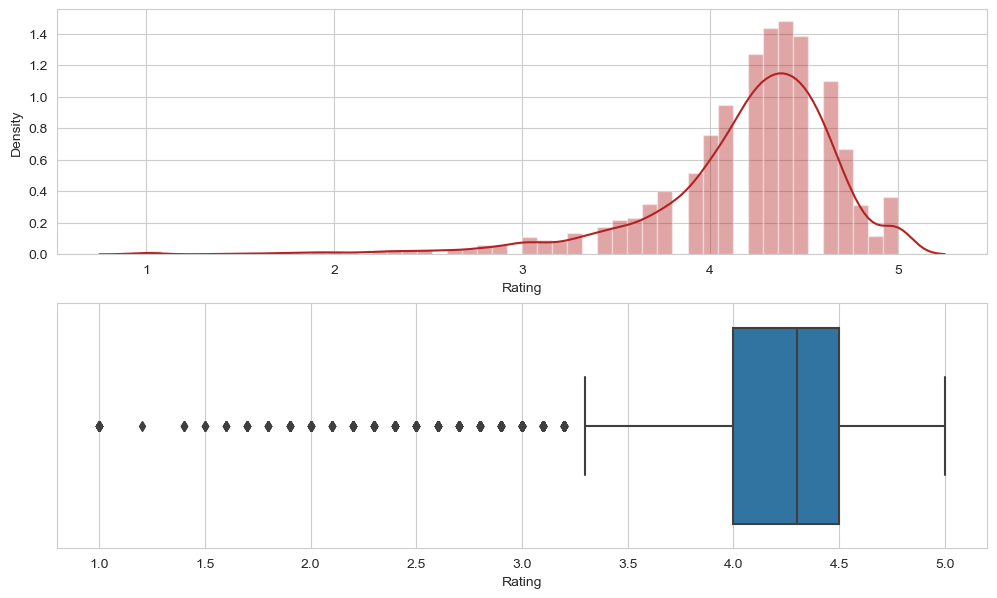

In [24]:
# The rows containing NaN values in the Rating column
apps[apps['Rating'].isnull()]
apps[(apps['Rating'] <1) | (apps['Rating']>5)]
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(apps[~apps['Rating'].isnull()]['Rating'].mean(),4)

median_rating = apps[~apps['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(apps['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=apps, ax=ax[1])
# Replacing the NaN values in the 'Rating' colunm with its median value
apps['Rating'].fillna(value=median_rating,inplace=True)

In [25]:
# List of characters to remove
unwanted_characters = ["+",",","$","M"]
# List of column names to clean
cols_clean = ["Installs","Size","Price"]

# Loop for each column
for col in cols_clean:
    # Replace each character with an empty string
    for char in unwanted_characters:
          apps[col] = apps[col].str.replace(char, '', regex=False)
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col], errors='coerce')

In [67]:
apps.drop_duplicates(subset = 'App', inplace = True)
apps.shape

(8114, 13)

In [68]:
apps = apps.dropna(subset=cols_clean)

In [69]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0,9.6,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


### Exploratory analysis

   ### 1) Number of Apps in each Category

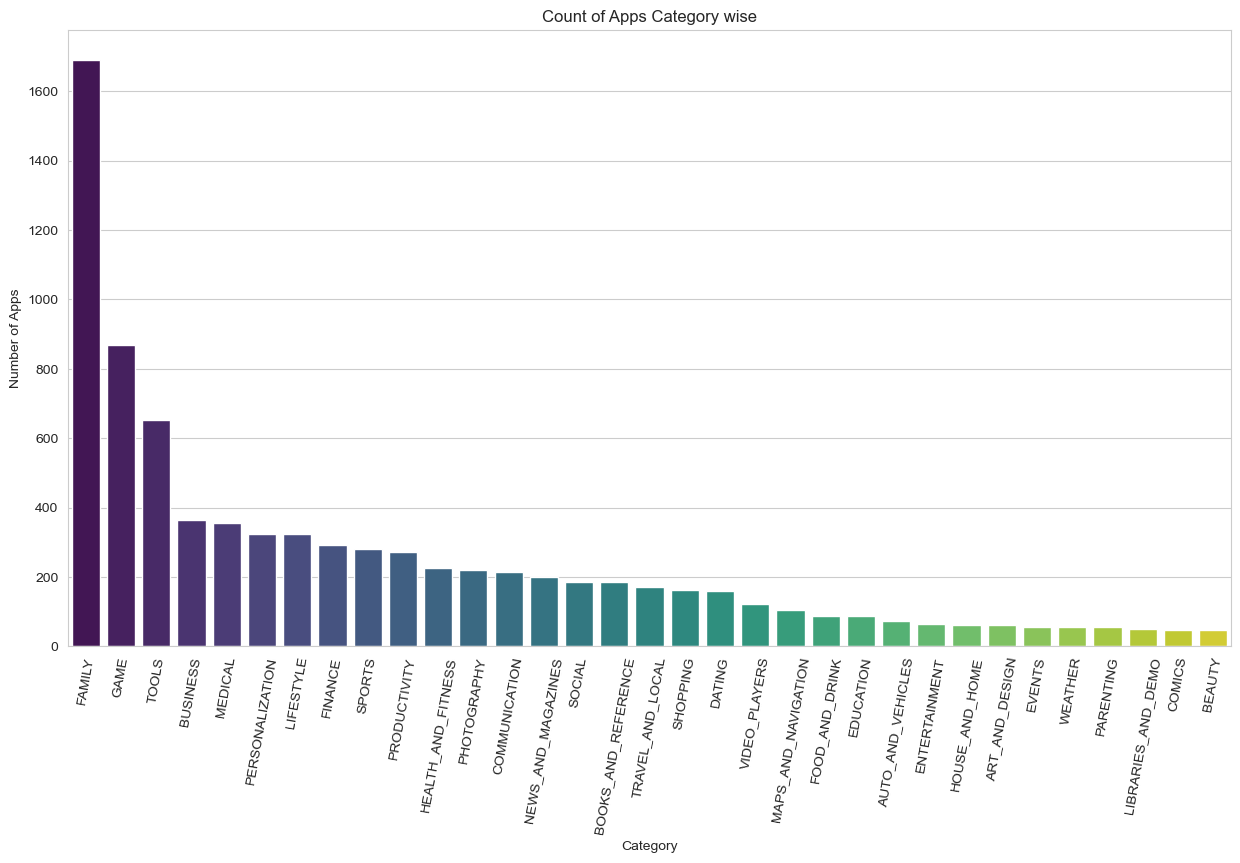

In [70]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=apps,palette='viridis',order=apps['Category'].value_counts(ascending=False).index)
plt.title('Count of Apps Category wise')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

<b>Inference</b>: The chart clearly shows that the "Family" category has the highest number of apps, followed by "Game" and "Tools." This insight is crucial for understanding which categories dominate the Play Store, which can help businesses decide where to focus their app development efforts based on competition and market demand. For example, entering a less crowded category might provide a better chance for visibility, while competing in a crowded category like "Family" might require a unique value proposition to stand out.

### 2) Top Categories with maximum Installs

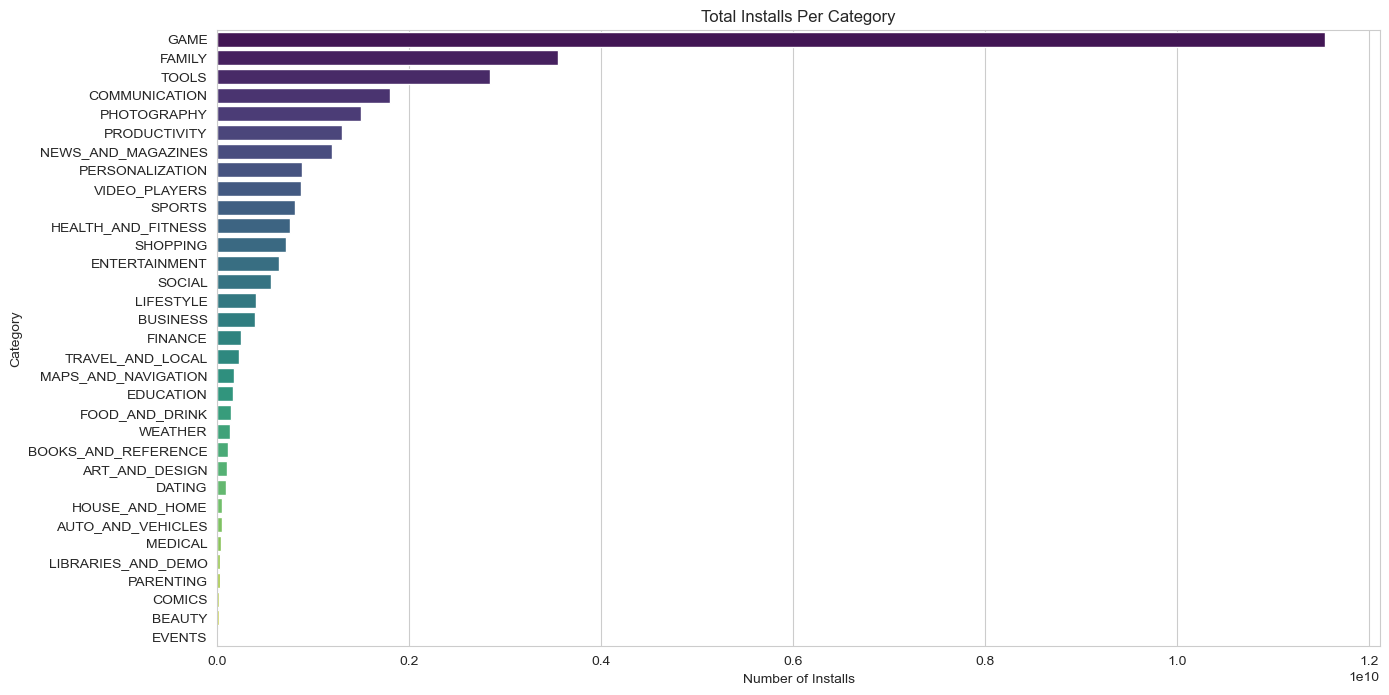

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'apps' is your original DataFrame
installs_per_category = apps.groupby('Category')['Installs'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Installs', y='Category', data=installs_per_category, palette='viridis', order=installs_per_category.sort_values('Installs',ascending = False).Category)

# Add titles and labels
plt.title('Total Installs Per Category')
plt.xlabel('Number of Installs')
plt.ylabel('Category')

# Show the plot
plt.show()

<b>Inference</b>: The "GAME" category has by far the most installs, significantly higher than any other category. This suggests that games are the most popular type of application among users, indicating a strong demand in this area. The "FAMILY" and "TOOLS" categories follow as the next most popular, although they have significantly fewer installs than games. This could suggest that these categories are also in high demand, perhaps due to their broad utility or appeal to a wide range of users.

Categories like "EVENTS," "BEAUTY," and "COMICS" have the fewest installs, suggesting these are niche categories with a smaller user base. This could imply limited demand or a more specialized audience.

### 3) Average Rating of Categories

In [72]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Calculate the average app rating
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Create the histogram for the distribution of app ratings
data = [go.Histogram(x=apps['Rating'])]

# Layout for the plot including a vertical dashed line for the average rating
layout = go.Layout(
    shapes=[{
        'type': 'line',
        'x0': avg_app_rating,
        'y0': 0,
        'x1': avg_app_rating,
        'y1': 1000,
        'line': {'dash': 'dashdot'}
    }],
    title='Distribution of App Ratings',
    xaxis_title='Rating',
    yaxis_title='Count'
)

# Plot the histogram
pyo.iplot({'data': data, 'layout': layout})


Average app rating =  4.188969682031058


<b>Inferernce</b>: The histogram shows that most apps have a rating between 4 and 4.5, with a significant spike around 4. This suggests that a large proportion of apps on the Play Store are well-regarded by users.Apps with higher ratings (between 4 and 5) likely have more positive user sentiment. The histogram’s right skew suggests that most users are satisfied with their app experiences, contributing to higher overall ratings.

C:\Users\punij\AppData\Local\Temp\ipykernel_31872\144424096.py:13: UserWarning:

Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.

C:\Users\punij\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from current font.



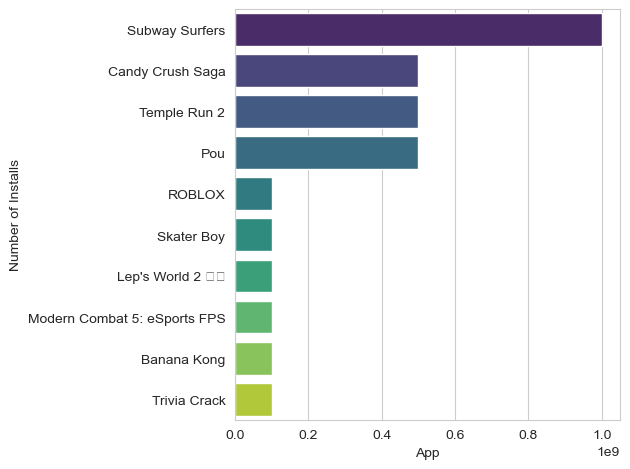

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

def findtop10incategory(str):
    str = str.upper()
    top10 = apps[apps['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)       
    # Plot the top 10 apps by installs
   # plt.title('Top 10 Installed Apps in ' + category, size=15)     
    sns.barplot(x='Installs', y='App', data=top10apps, palette='viridis', order=top10apps.sort_values('Installs',ascending = False).App)
    plt.xlabel('App')
    plt.ylabel('Number of Installs')
    plt.tight_layout()
    plt.show()

# Example usage
findtop10incategory('GAME')

<b>Inference</b>: 

### 4) Number of free and paid apps

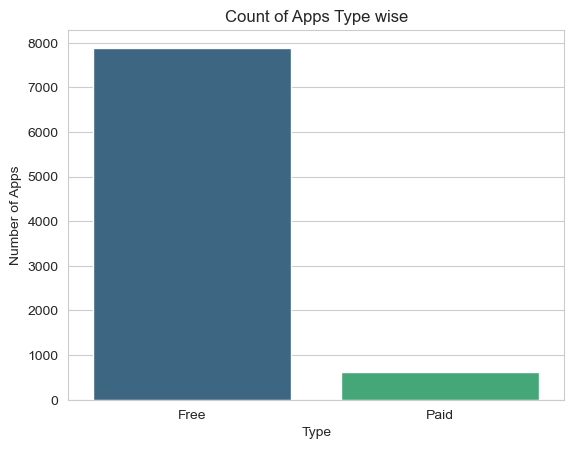

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Type', data=apps,palette='viridis',order=apps['Type'].value_counts(ascending=False).index)
plt.title('Count of Apps Type wise')
plt.ylabel('Number of Apps')
plt.show()

<b>Inference</b>: From the above graph we can see that 92% of apps in google play store are free and 8% are paid.

### 5) Content Rating on playstore

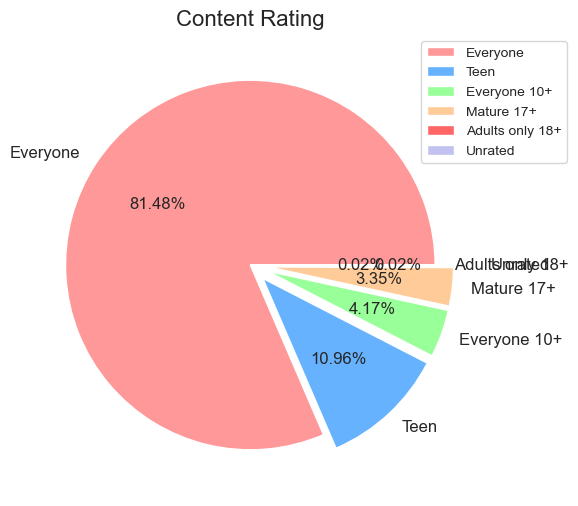

In [79]:
import matplotlib.pyplot as plt

# Assuming 'apps' is your DataFrame and 'Content Rating' is the column with the ratings
data = apps['Content Rating'].value_counts()

# Define labels and colors
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666', '#C2C2F0']  # Example colors
explode = (0, 0.1, 0.1, 0.1, 0.0, 0.2)  # Adjusted to match the number of labels

# Create pie chart
plt.figure(figsize=(6, 6))  # Smaller size
plt.pie(data, labels=labels, colors=colors, autopct='%.2f%%', explode=explode, 
        textprops={'fontsize': 12})  # Smaller font size for labels
plt.title('Content Rating', size=16, loc='center')  # Smaller title size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjusted legend position
plt.show()

<b>Inference</b>: The vast majority of apps (80.92%) are rated for "Everyone," indicating that most developers aim to reach the broadest possible audience. This makes sense from a market perspective as apps targeting a general audience have a higher potential for downloads and user engagement.

### 6) Relation between app category and app price

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5362,FAMILY,I Am Rich Pro,399.99


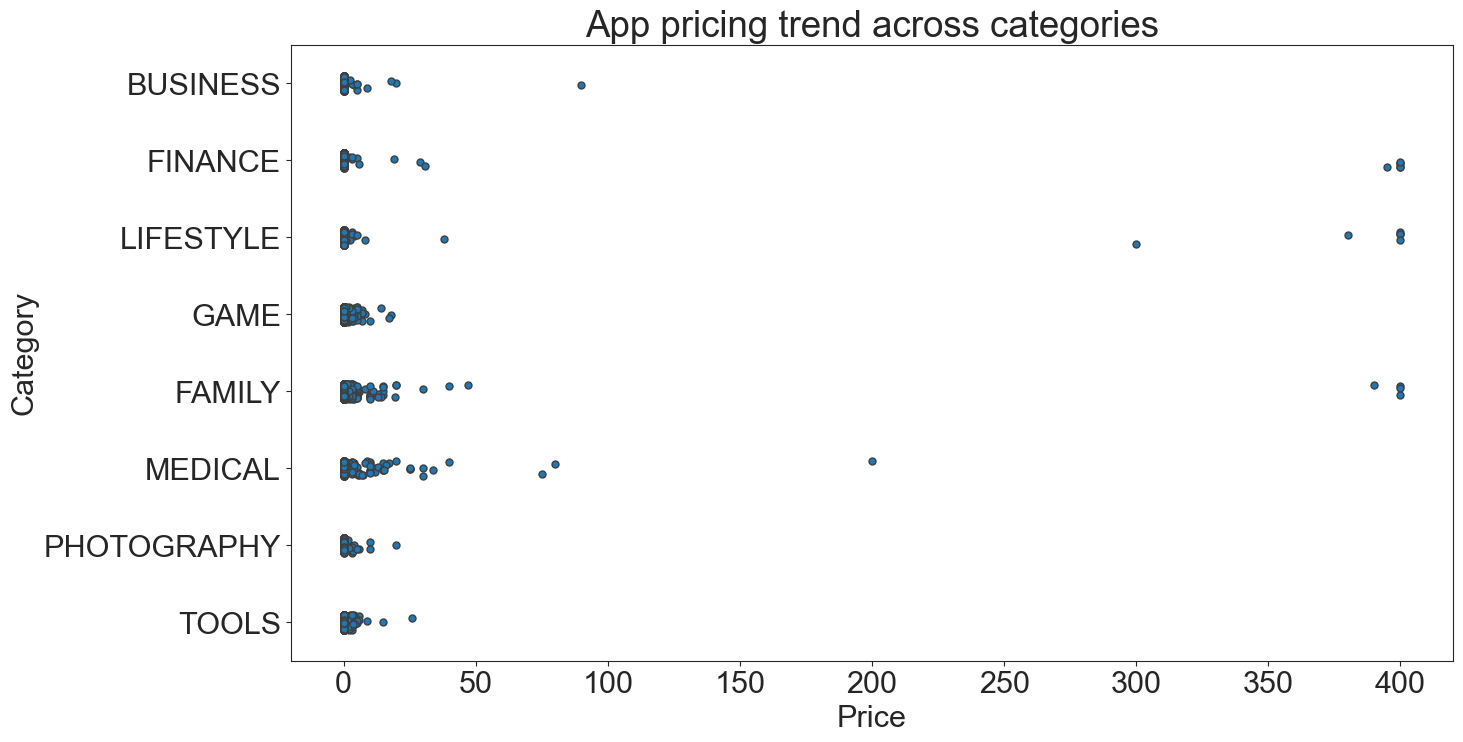

In [107]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

<b>Top Categories and App Installations</b>: The scatter plot shows app pricing trends across various categories such as BUSINESS, FINANCE, LIFESTYLE, etc. It suggests that certain categories, like LIFESTYLE and FINANCE, have apps with significantly higher prices. However, other categories such as TOOLS or PHOTOGRAPHY have apps with lower prices or are more likely to be free.

<b>Paid vs. Free Apps</b>: From the plot, it’s evident that the most expensive apps tend to cluster around specific categories like LIFESTYLE and FINANCE. This could indicate that apps in these categories are more likely to be paid, potentially influencing their user engagement and popularity. The presence of high-priced apps suggests that these categories might attract a niche audience willing to pay for premium features.

### 7) Relation between rating and price and size of the app

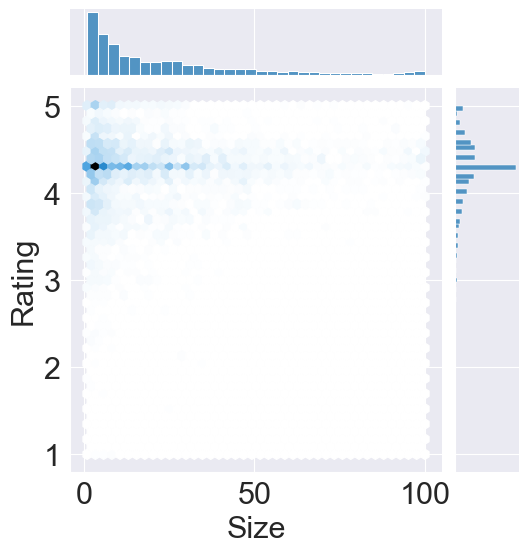

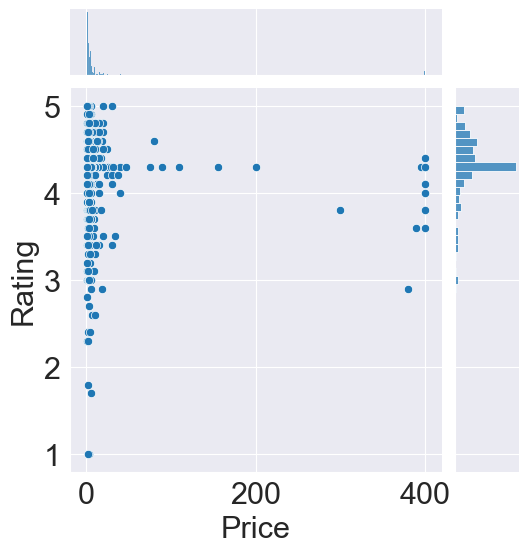

In [108]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps["Category"]).filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

Apps with high ratings tend to cluster around smaller sizes and lower prices, indicating that users may prefer apps that are lightweight and either free or inexpensive.The plots show a stark difference in ratings distribution between free and paid apps, with many high-rated apps being free or low-cost. This suggests that being free might positively influence user ratings.

### 8) Android version based on each category

Category           Android Ver
ART_AND_DESIGN     4.0            50
                   2.0             8
                   3.0             2
                   5.0             1
AUTO_AND_VEHICLES  4.0            57
                                  ..
WEATHER            4.0            36
                   2.0             9
                   5.0             7
                   1.0             2
                   3.0             1
Name: Android Ver, Length: 189, dtype: int64


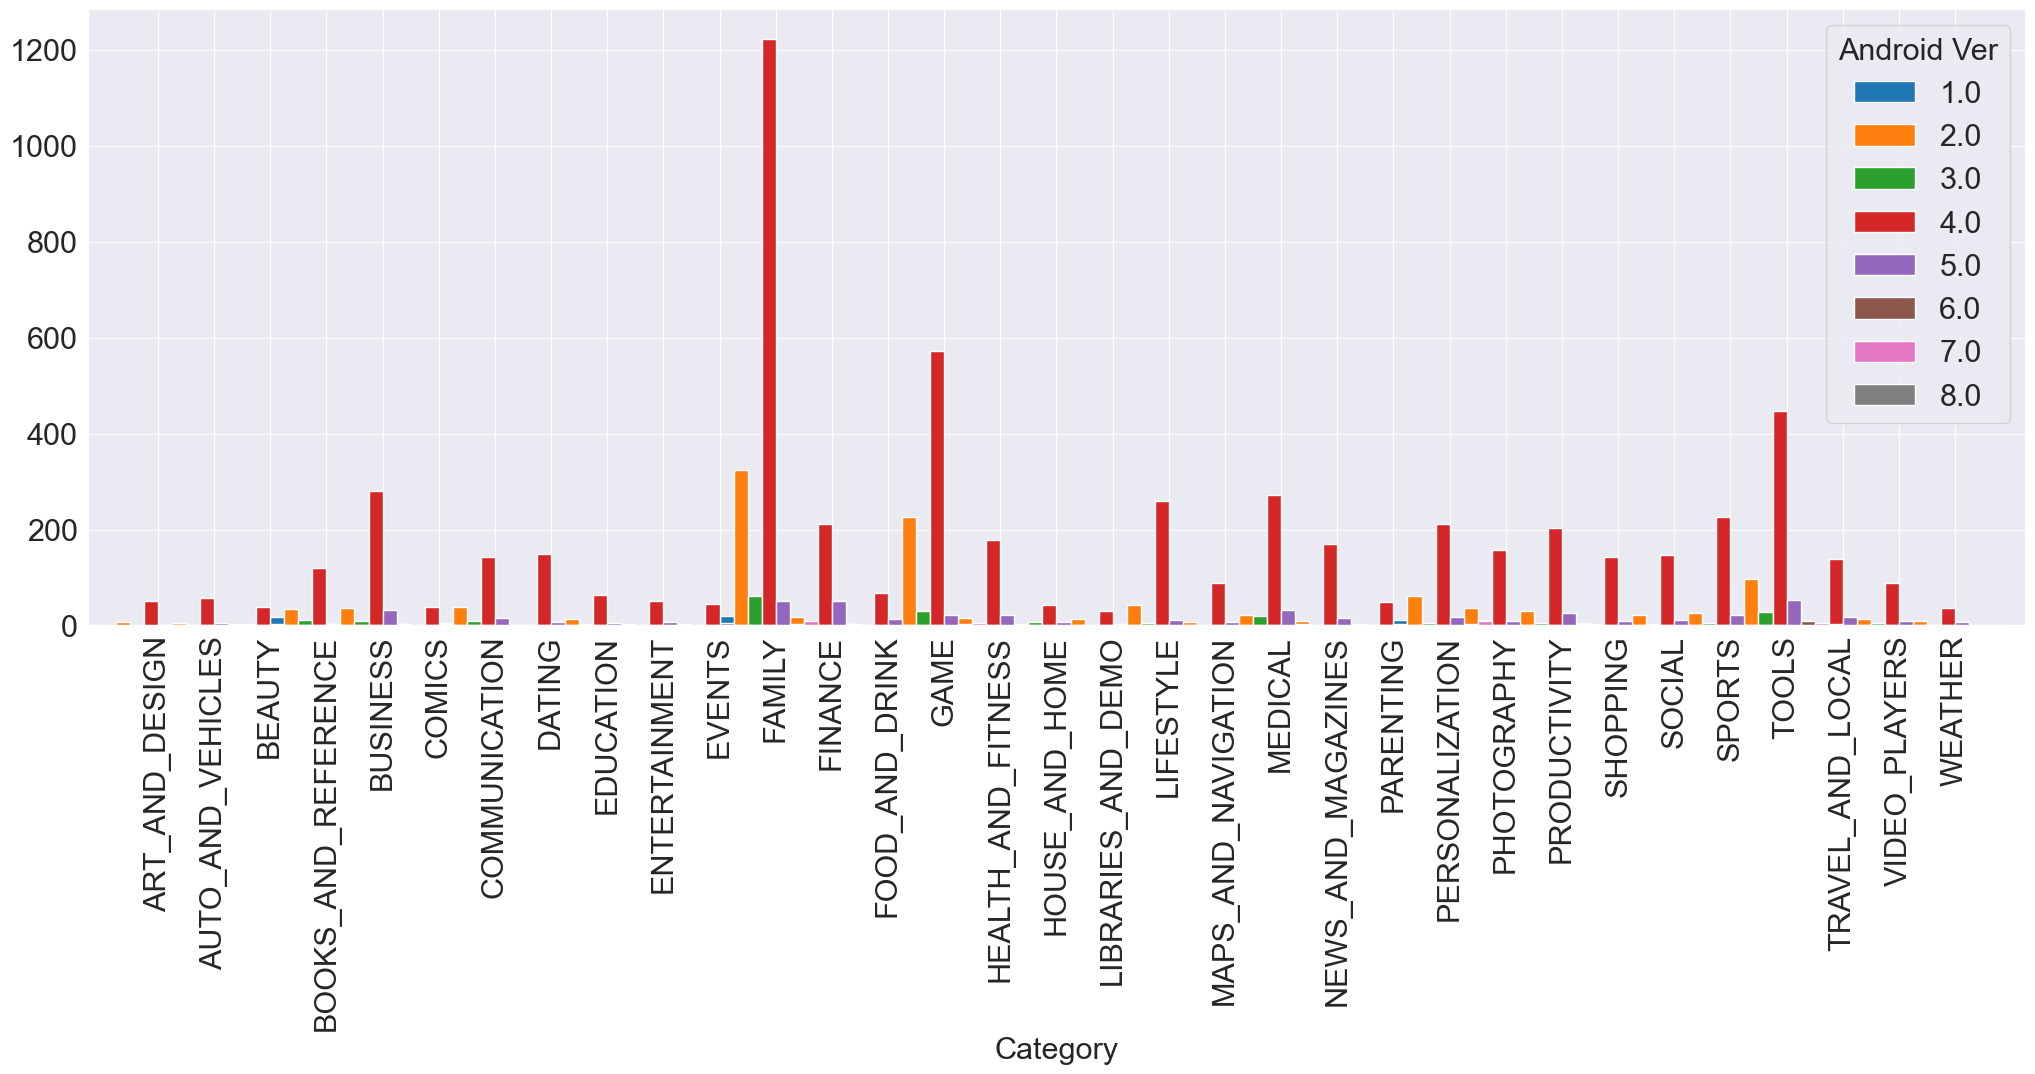

In [110]:
apps['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
apps['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
apps['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
apps['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
apps['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
apps['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
apps['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
apps['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
apps['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
apps['Android Ver'].fillna('1.0', inplace=True)
print(apps.groupby('Category')['Android Ver'].value_counts())
Type_cat = apps.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

It is clearly evident from the above plot that majority of the apps are working on Android_Ver 4.0 and up.

### Update vs Rating

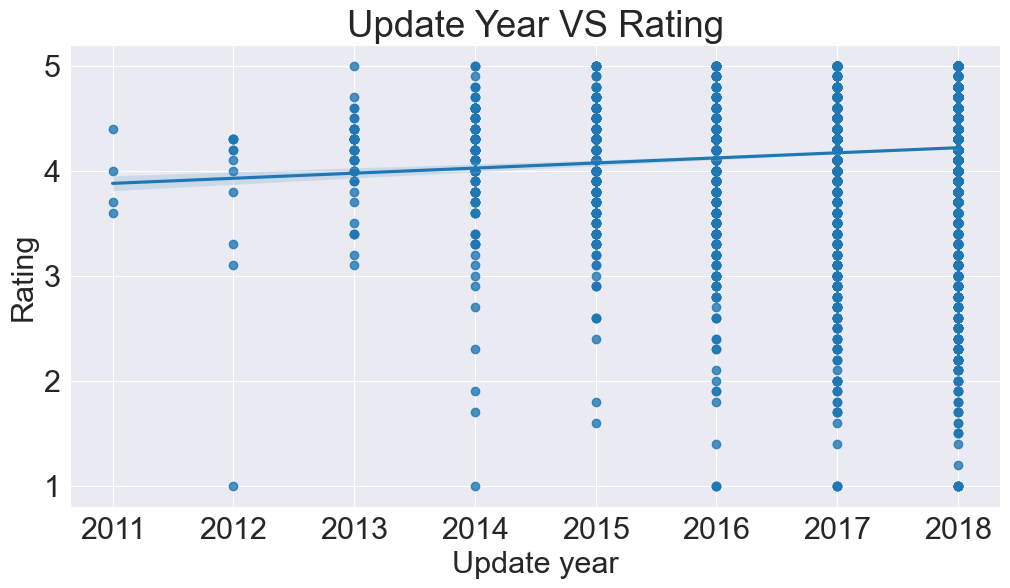

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'apps' is your DataFrame and 'Last Updated' is the column containing dates as strings

# Convert 'Last Updated' to datetime format
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

# Now fetch the update year
apps["Update year"] = apps["Last Updated"].apply(lambda x: x.year).astype('int64')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x="Update year", y="Rating", data=apps)
plt.title("Update Year VS Rating")
plt.show()

<Axes: xlabel='Update year'>

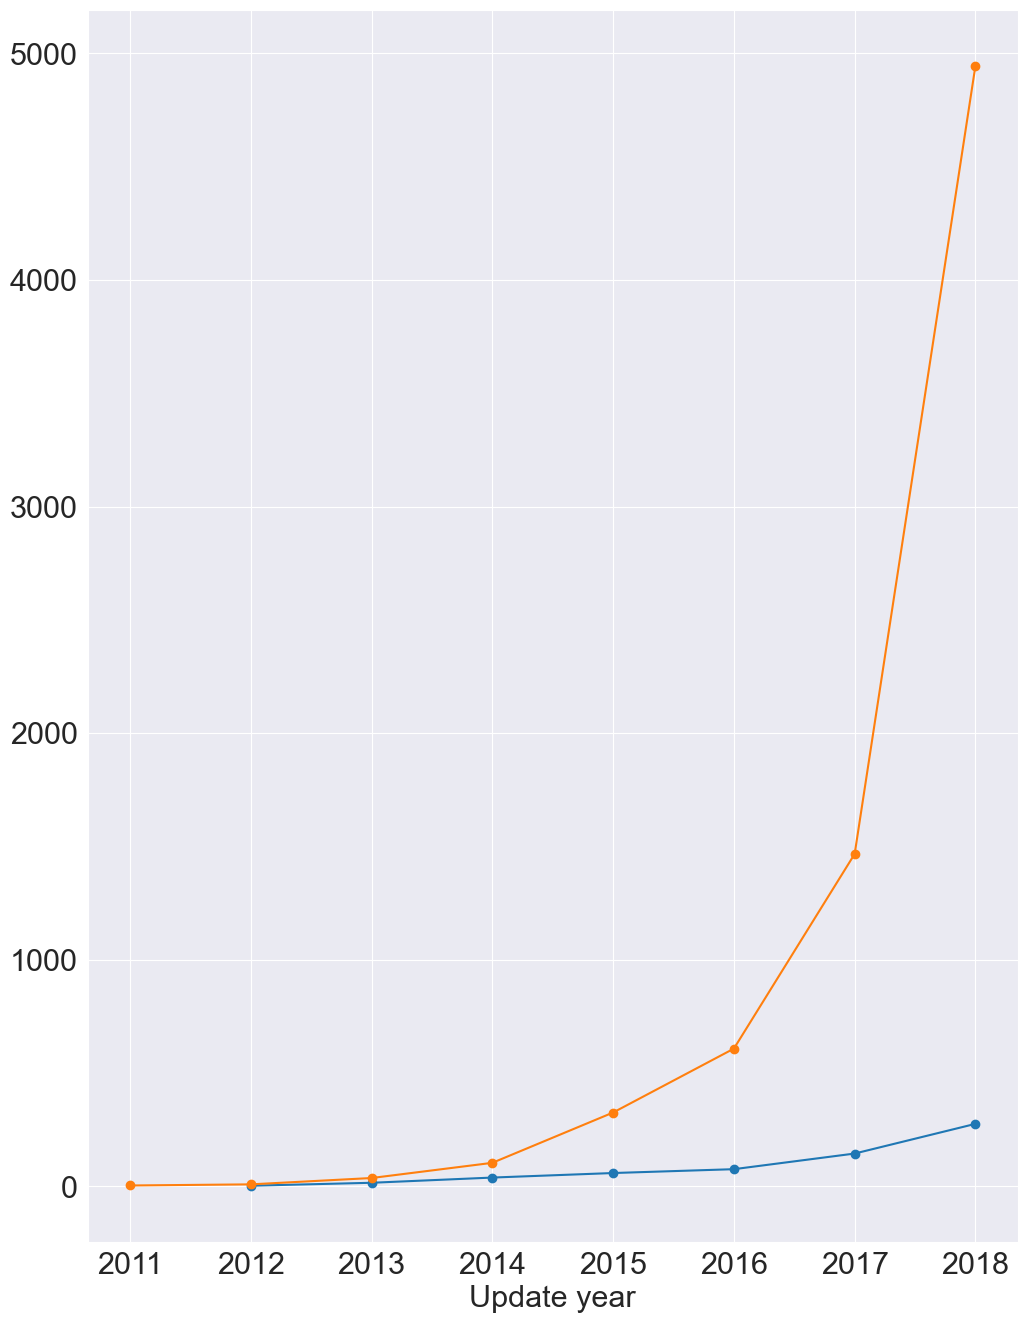

In [115]:
paid_df=apps[apps['Type']=='Paid']
free_df=apps[apps['Type']=='Free']
paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

The plot above shows a comparison between free and paid apps added or updated over the years. The data suggests that before 2011, there were no paid apps available. As the years progressed, the number of free apps increased significantly compared to paid apps. Specifically, from 2011 to 2018, the proportion of free apps grew from 80% to 96%, while paid apps decreased from 20% to just 4%. This trend indicates a clear preference among users for free apps.

## Sentiment Analysis of user reviews

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob

# Load the dataset
file_path = 'user_reviews1.csv'  # Adjust this path to your file location
reviews_df = pd.read_csv(file_path)

# Drop unnecessary columns and handle missing data
reviews_df = reviews_df.drop(columns=['Unnamed: 2', 'Unnamed: 3']).dropna(subset=['Translated_Review'])

# Display basic info
print(reviews_df.info())
print(reviews_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App                37427 non-null  object
 1   Translated_Review  37427 non-null  object
dtypes: object(2)
memory usage: 877.2+ KB
None
                     App                                  Translated_Review
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...
1  10 Best Foods for You    This help eating healthy exercise regular basis
3  10 Best Foods for You         Works great especially going grocery store
4  10 Best Foods for You                                       Best idea us
5  10 Best Foods for You                                           Best way


In [82]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    # Determine sentiment based on polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, polarity, subjectivity

# Apply sentiment analysis to the reviews
reviews_df['Sentiment'], reviews_df['Polarity'], reviews_df['Subjectivity'] = zip(*reviews_df['Translated_Review'].apply(analyze_sentiment))

# Display the updated dataframe
print(reviews_df.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Polarity  Subjectivity  
0  Positive      1.00      0.533333  
1  Positive      0.25      0.288462  
3  Positive      0.40      0.875000  
4  Positive      1.00      0.300000  
5  Positive      1.00      0.300000  


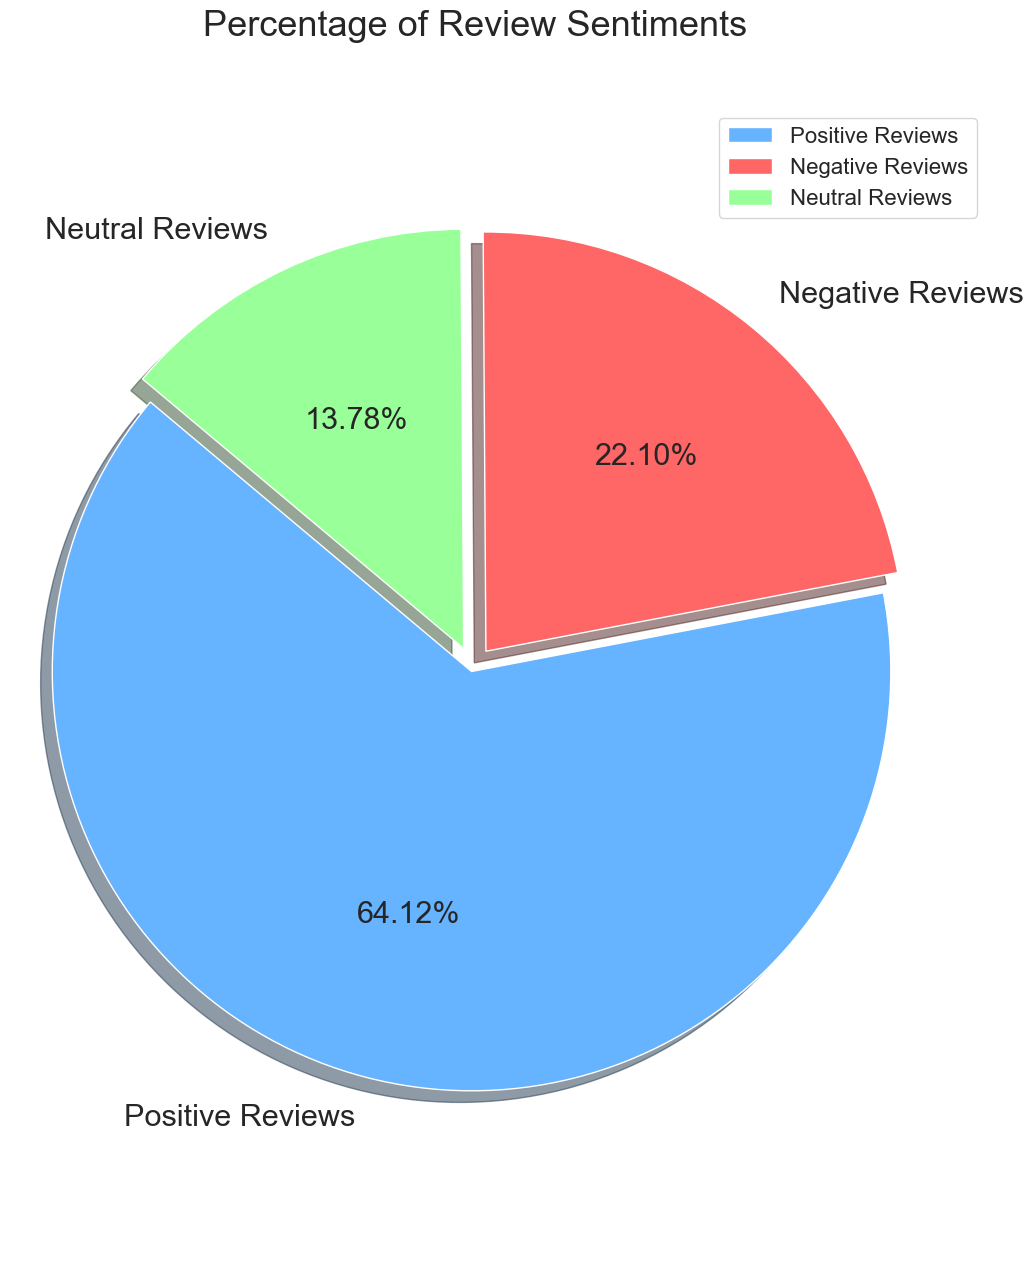

In [92]:
import matplotlib.pyplot as plt

# Assuming 'reviews_df' is already defined and contains a 'Sentiment' column
counts = list(reviews_df['Sentiment'].value_counts())
labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']

# Setting custom colors and font size
colors = ['#66b3ff', '#ff6666', '#99ff99']
plt.rcParams['font.size'] = 22
plt.rcParams['figure.figsize'] = (12, 16)

# Creating the pie chart with additional style settings
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], colors=colors, shadow=True, autopct="%.2f%%", startangle=140)

plt.title('Percentage of Review Sentiments', fontsize=26)
plt.axis('equal')  # Ensures that the pie is drawn as a circle.
plt.legend(bbox_to_anchor=(0.75, 0.85), fontsize=16)
plt.show()

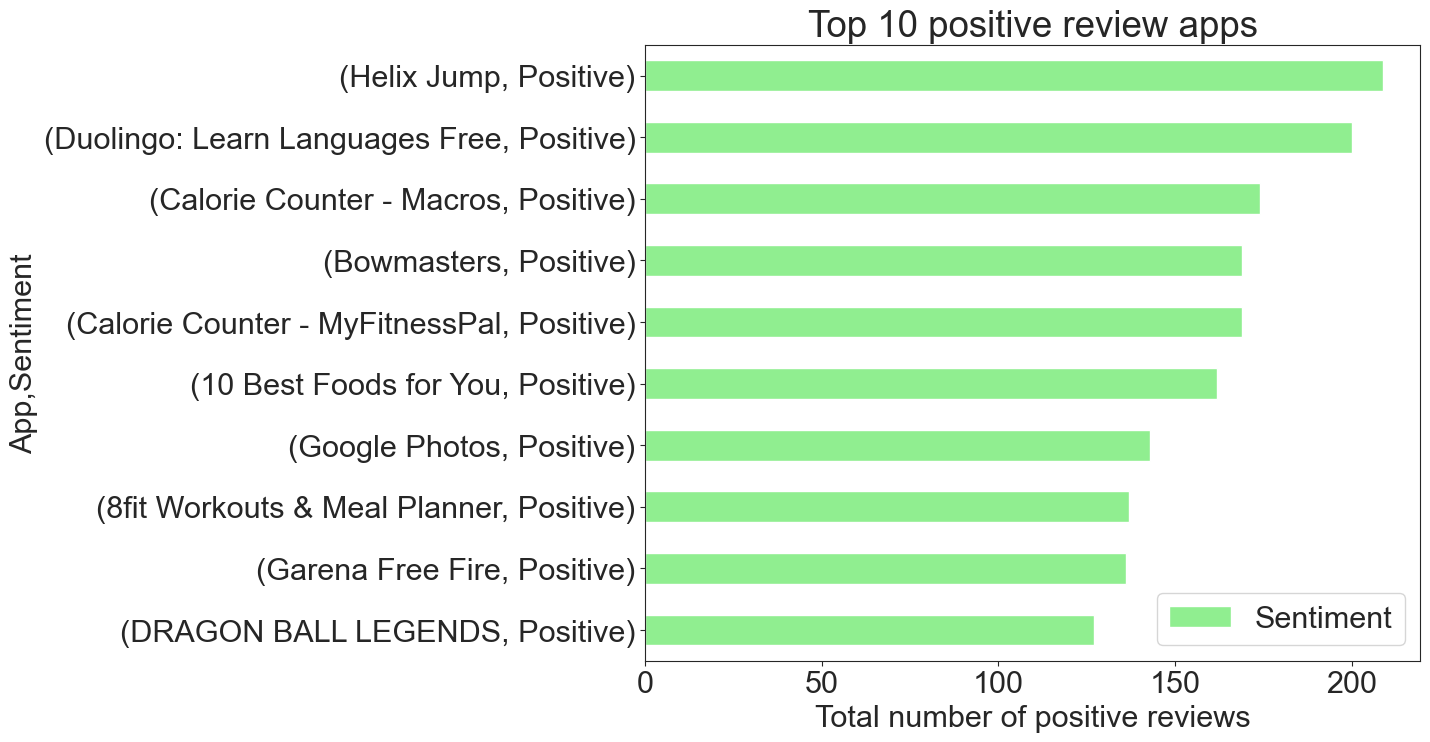

In [101]:
# positive reviews
positive_reviews=reviews_df[reviews_df['Sentiment']=='Positive']
positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='lightgreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

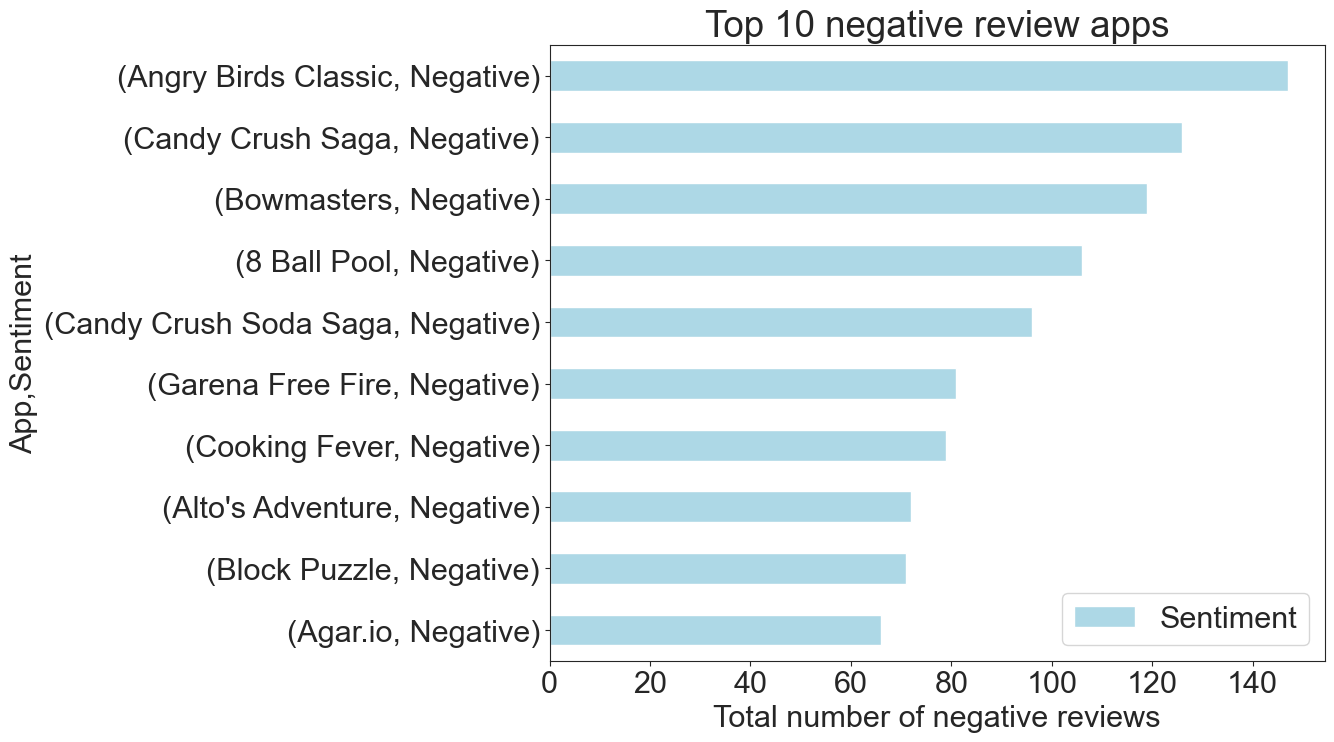

In [100]:
# negative reviews
negative_reviews=reviews_df[reviews_df['Sentiment']=='Negative']
negative_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='lightblue').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

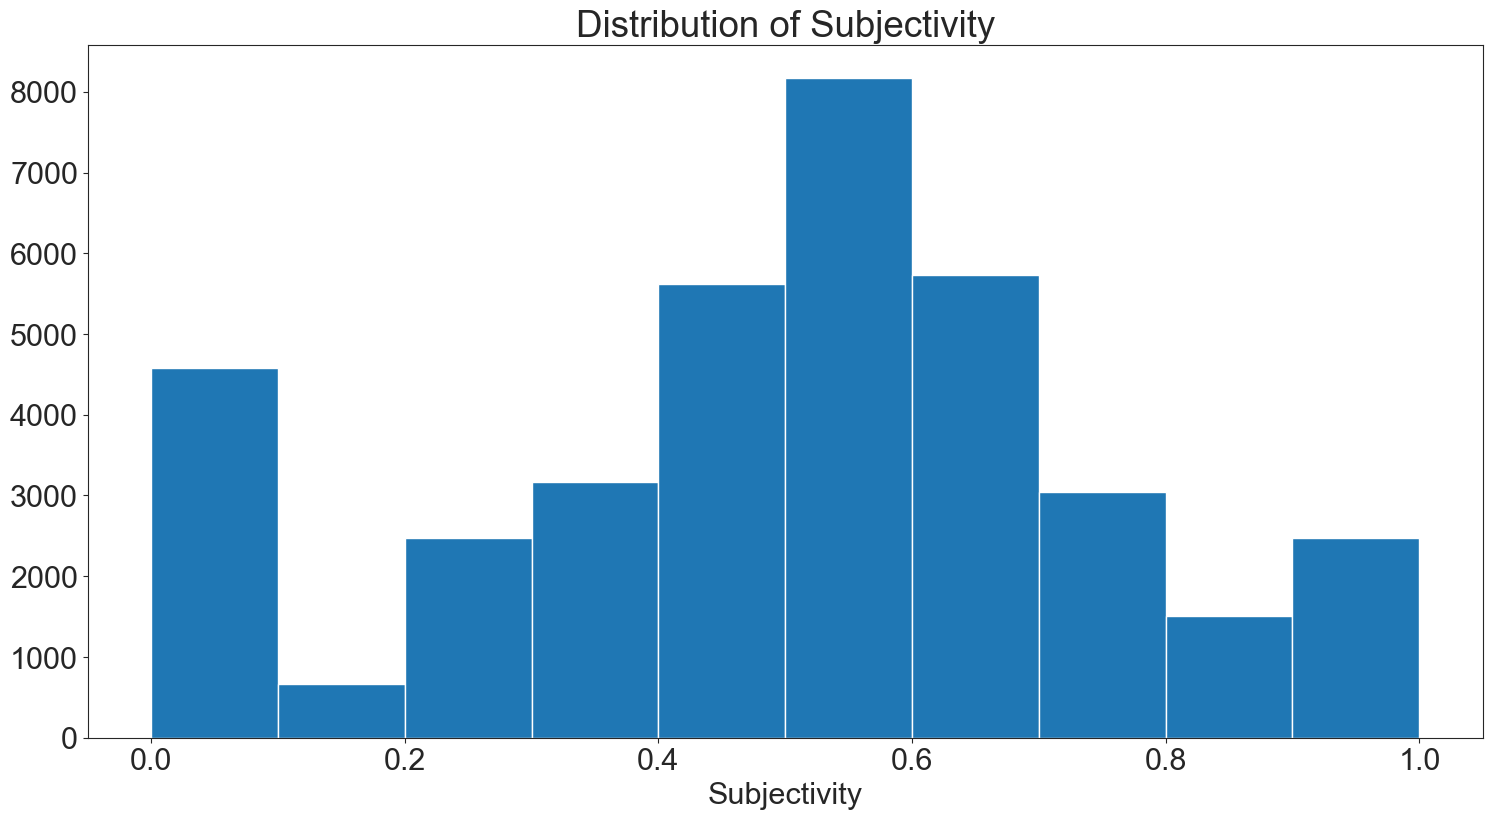

In [103]:
reviews_df.Subjectivity.value_counts()
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(reviews_df[reviews_df['Subjectivity'].notnull()]['Subjectivity'])
plt.show()

0 - objective(fact), 1 - subjective(opinion)

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

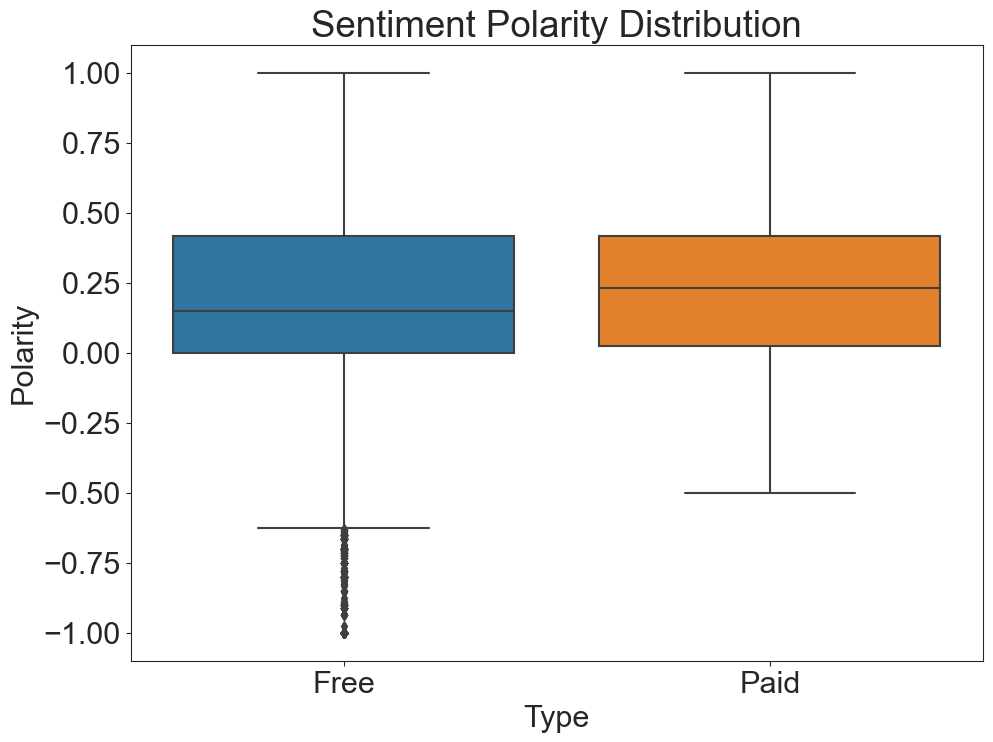

In [106]:
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

free apps generally receive more positive sentiment than paid apps. This could be due to higher expectations from paid apps, leading to more critical reviews, whereas users may be more forgiving towards free apps.
Since sentiment polarity is higher in the paid apps, it is likely that free apps may perform better in terms of user satisfaction, which could translate to better ratings and higher user engagement.

C:\Users\punij\AppData\Local\Temp\ipykernel_31872\3906985353.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, ' Heatmap for merged Dataframe')

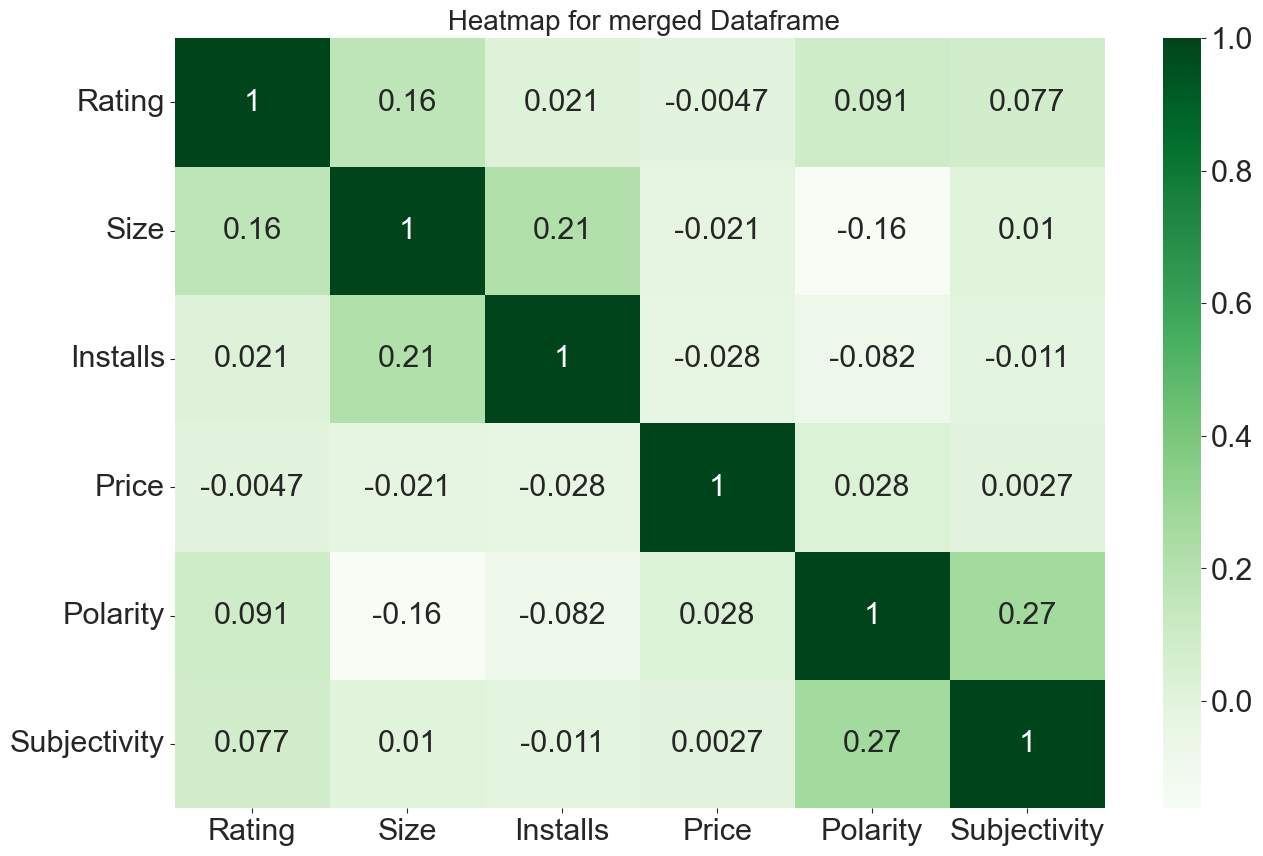

In [105]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

In [116]:
# Convert sentiment labels to numerical values for classification
sentiment_label = {'Positive': 1, 'Negative': 0, 'Neutral': 2}
reviews_df['Sentiment_Label'] = reviews_df['Sentiment'].map(sentiment_label)

# Split data into features and target
X = reviews_df['Translated_Review']
y = reviews_df['Sentiment_Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [117]:
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=100)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)

# Evaluate the models
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

# Display classification reports
print("Multinomial Naive Bayes Report:\n", classification_report(y_test, nb_predictions))
print("Random Forest Report:\n", classification_report(y_test, rf_predictions))
print("Logistic Regression Report:\n", classification_report(y_test, lr_predictions))

Multinomial Naive Bayes Accuracy: 0.7365749398877905
Random Forest Accuracy: 0.9032861341170184
Logistic Regression Accuracy: 0.9159764894469676
Multinomial Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.89      0.41      0.56      1653
           1       0.72      0.99      0.83      4784
           2       0.88      0.10      0.18      1049

    accuracy                           0.74      7486
   macro avg       0.83      0.50      0.52      7486
weighted avg       0.78      0.74      0.68      7486

Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      1653
           1       0.90      0.97      0.94      4784
           2       0.86      0.86      0.86      1049

    accuracy                           0.90      7486
   macro avg       0.90      0.86      0.87      7486
weighted avg       0.91      0.90      0.90      7486

Logistic Regression Report:
         